In [1]:
#imports all custom modules
from wrangle import *

# shhh
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create our DataFrame and peek it's looking okay
df = wrangle_tb()
df.head()

,country,year,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference,new_case_difference
384,Bangladesh,1990,107385847,504.0,540000.0,226.0,240000.0,80.0,86000.0,199.0,0.0,0.0,0.0
385,Bangladesh,1991,109934590,501.0,550000.0,225.0,250000.0,80.0,87000.0,200.0,10000.0,1000.0,10000.0
386,Bangladesh,1992,112430968,499.0,560000.0,224.0,250000.0,79.0,89000.0,201.0,10000.0,2000.0,0.0
387,Bangladesh,1993,114897543,500.0,570000.0,224.0,260000.0,79.0,90000.0,202.0,10000.0,1000.0,10000.0
388,Bangladesh,1994,117369492,498.0,580000.0,225.0,260000.0,78.0,92000.0,202.0,10000.0,2000.0,0.0


In [3]:
# Check what datatypes we're working with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 384 to 4495
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       252 non-null    object 
 1   year                          252 non-null    int64  
 2   estimated_total_pop           252 non-null    int64  
 3   estimated_cases_per_100k      252 non-null    float64
 4   estimated_cases               252 non-null    float64
 5   estimated_new_case_per_100k   252 non-null    float64
 6   estimated_new_cases           252 non-null    float64
 7   estimated_mortality_per_100k  252 non-null    float64
 8   estimated_deaths              252 non-null    float64
 9   pop_to_tb                     252 non-null    float64
 10  case_difference               252 non-null    float64
 11  death_difference              252 non-null    float64
 12  new_case_difference           252 non-null    float64
dtypes:

In [4]:
# Checking how many countries are in WHO's South East Asia Region (SEA)
print(f"Number of Unique Countries: {df.country.nunique()}")

Number of Unique Countries: 11


Let's find one country to focus on to try out Time Series, sine we want to predict future case amounts.

#### Questions for Data:
- Which area has the most TB per 100k?
- Which area has the highest proportional growth for cases?
- Which area has the highest death ratio?
- Which area has the largest proportional growth for deaths?

In [5]:
# Checking cases to tb
print(f'''Country with highest proportional infection: {df[df.pop_to_tb == df.pop_to_tb.min()].country} 
{df.pop_to_tb.min()} people to 1 case.''')
print(f"It should match with the highest cases per 100k : {df[df.estimated_cases_per_100k == df.estimated_cases_per_100k.max()].country}")

Country with highest proportional infection: 552    Bhutan
Name: country, dtype: object 
57.0 people to 1 case.
It should match with the highest cases per 100k : 552    Bhutan
Name: country, dtype: object


In [6]:
print("Countries by mean population to tb:")
print(df.groupby('country').pop_to_tb.mean())
print("")
print("Least amount of people per 1 TB case:")
print(df.groupby('country').pop_to_tb.mean().min())

Countries by mean population to tb:
country
Bangladesh                                218.166667
Bhutan                                    189.791667
Democratic People's Republic of Korea     207.041667
India                                     275.958333
Indonesia                                 265.416667
Maldives                                 1166.166667
Myanmar                                   144.000000
Nepal                                     413.875000
Sri Lanka                                 937.250000
Thailand                                  484.291667
Timor-Leste                               134.750000
Name: pop_to_tb, dtype: float64

Least amount of people per 1 TB case:
134.75


Timor-Leste matches that, let's visualise some breakdowns

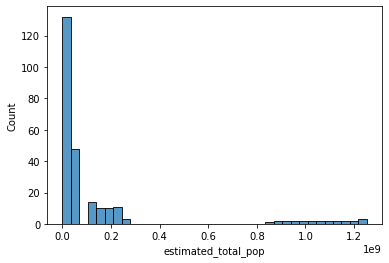

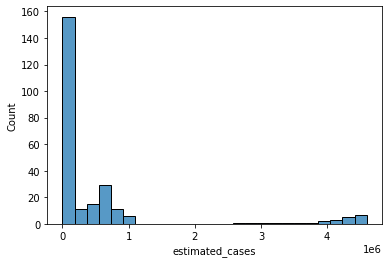

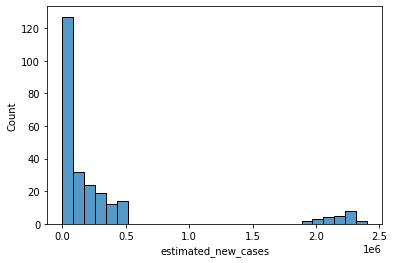

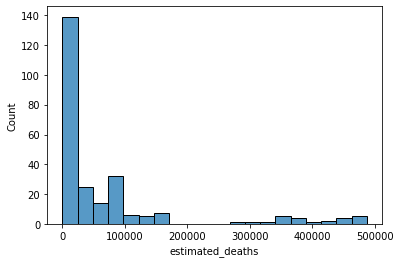

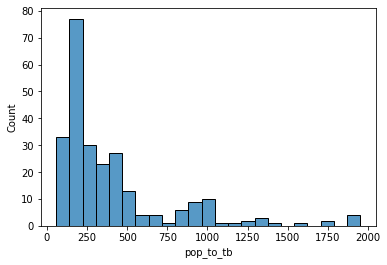

In [7]:
hist_col(df)

In [8]:
print(f"Highest Pop: {df.estimated_total_pop.max()}") 
print(f"Lowest Pop: {df.estimated_total_pop.min()}") 
print(f"Range : {df.estimated_total_pop.max() - df.estimated_total_pop.min()}")

Highest Pop: 1252139596
Lowest Pop: 215859
Range : 1251923737


The first four are influenced by population, the first one being population itself we can see there is a large chuck of countries with approximately 300mil or less (just over 200k) for population, and another smaller chunk with approximately 820mil to over 1.2bil. But the pop to tb chart really shows that a huge portion of cases are quite prevalent, with most being 500 or less, while there are a few lucky countries with 1,000 to almost 2,000.

While this is over the span of years, so we'll have a few repeats, it's still proportional.

> To put it into perspective, in 2020 the US had 7,174 cases of TB, with a Case rate of 2.2 per 100k. (CDC)

> In 1990, when this data starts, the US had 25,701 cases, and a Case Rate of 10.3 per 100k.
> And in 2013, when this data ends, the US had 9,545 caes, and a Case Rate of 3 per 100k. (CDC)

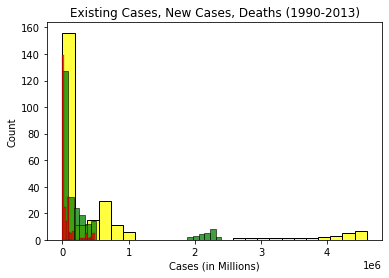

In [9]:
hist_est(df)

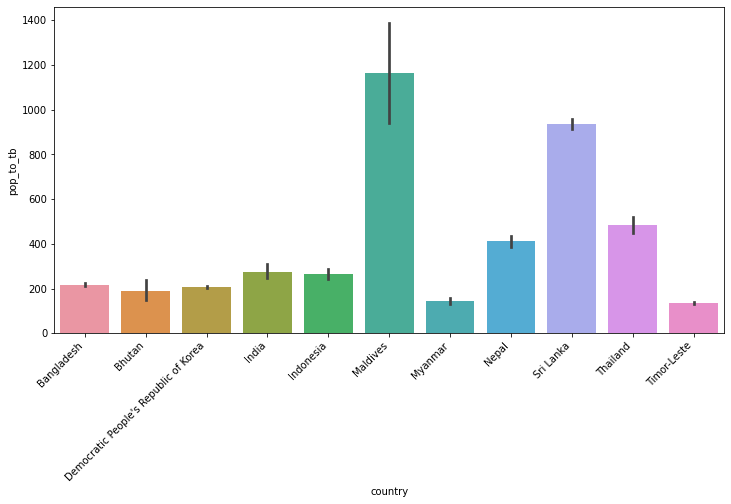

In [10]:
barplots(df)

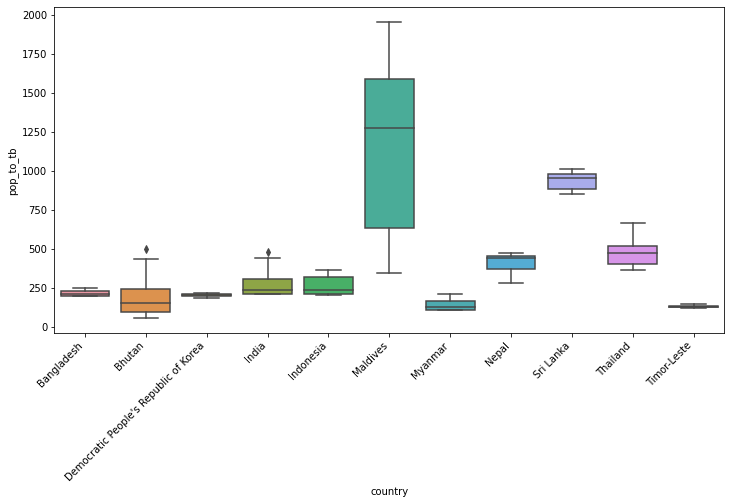

In [11]:
boxplots(df)

Looking at the charts to check if Bhutan really has the highest prevelance, going by mean over 1990 to 2013, Timor-Leste actually has a higher prevelance, and Myanmar in second. Bhutan just had a year with more prevelance. Though all three are fairly close.

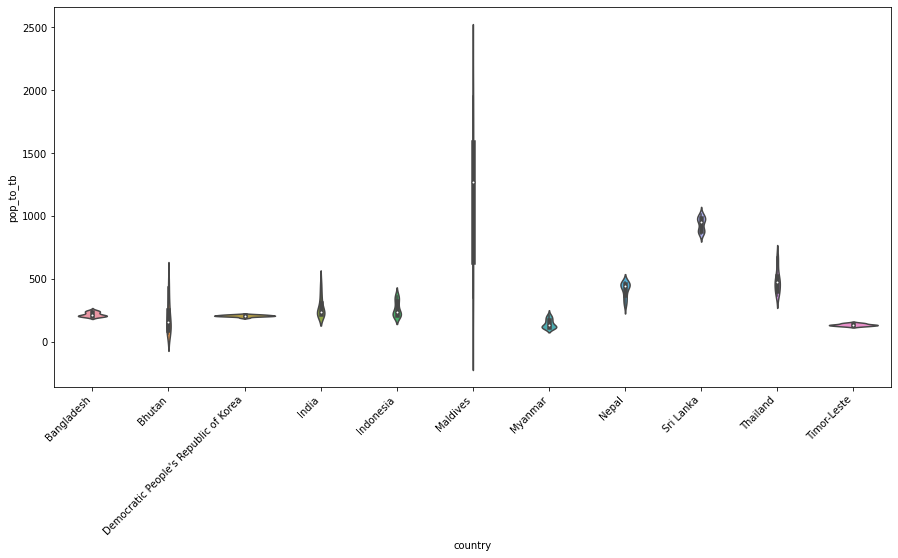

In [12]:
violin(df)

Not the prettiest violins, but they show how consistent some countries case to population count is, and how fluid others are.

For now, We'll analyse Myanmar since it has the second highest ratio, and a little more distribution than Timor-Leste

In [13]:
# pulling fresh, and narrowing to only the country of Myanmar, dropping country column, and turning year to a datetime.
# it fixes the issues of the differences pulling from another country for the first line.
df = wrangle_time()
df.head()

,estimated_total_pop,estimated_cases_per_100k,estimated_cases,estimated_new_case_per_100k,estimated_new_cases,estimated_mortality_per_100k,estimated_deaths,pop_to_tb,case_difference,death_difference,new_case_difference
year,,,,,,,,,,,
1990-01-01,42123003,894.0,380000.0,395.0,170000.0,155.6,65690.0,111.0,0.0,0.0,0.0
1991-01-01,42782387,894.0,380000.0,396.0,170000.0,156.8,67200.0,113.0,0.0,1510.0,0.0
1992-01-01,43422423,890.0,390000.0,397.0,170000.0,158.3,68900.0,111.0,10000.0,1700.0,0.0
1993-01-01,44052710,889.0,390000.0,399.0,180000.0,161.3,70800.0,113.0,0.0,1900.0,10000.0
1994-01-01,44686091,887.0,400000.0,402.0,180000.0,163.6,72900.0,112.0,10000.0,2100.0,0.0


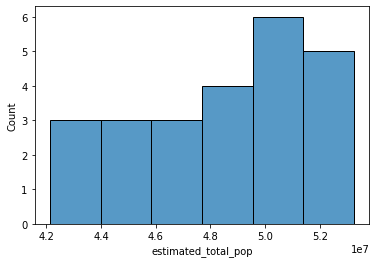

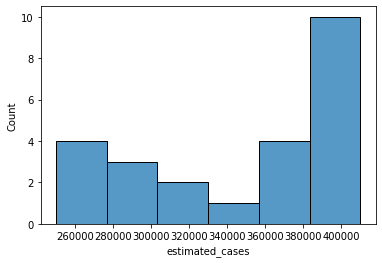

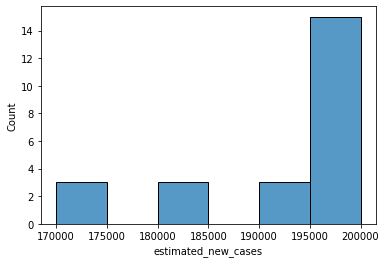

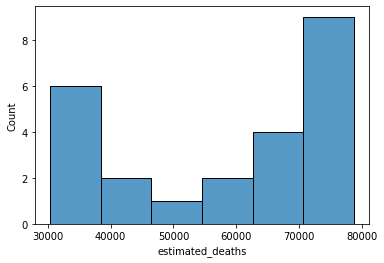

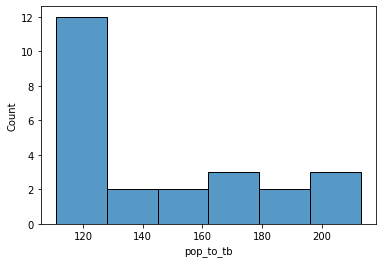

In [14]:
hist_col(df)

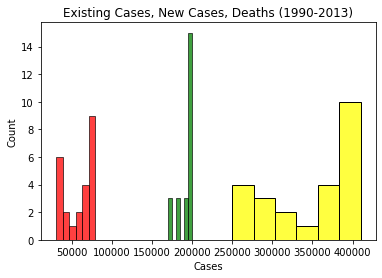

In [15]:
hist_est2(df)

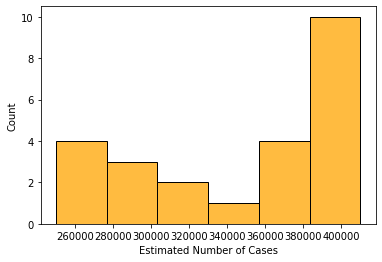

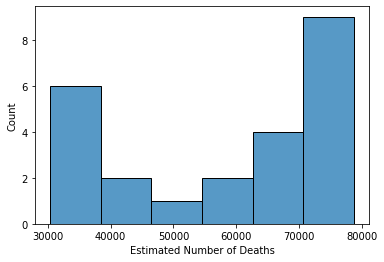

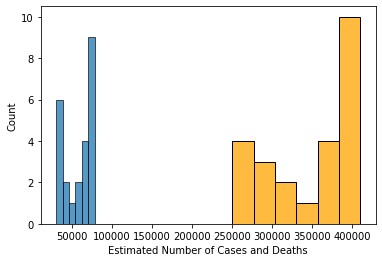

In [16]:
histoplots(df)

Correlation : 0.9962207875420114
    p-value : 7.603453461569432e-25


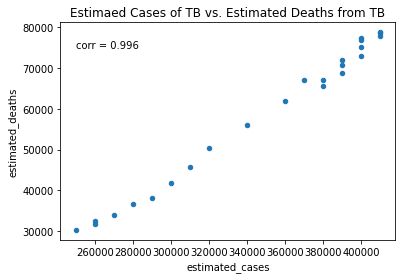

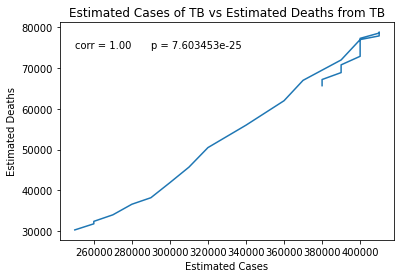

(0.9962207875420114, 7.603453461569432e-25)

In [17]:
correlation(df)

Split our Data:

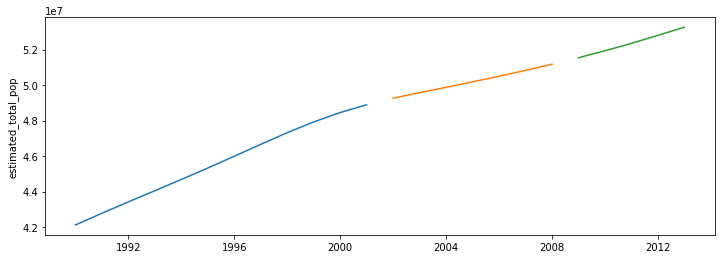

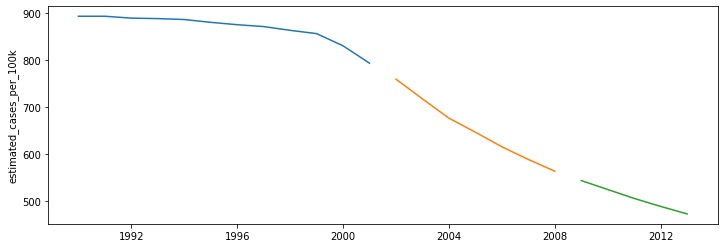

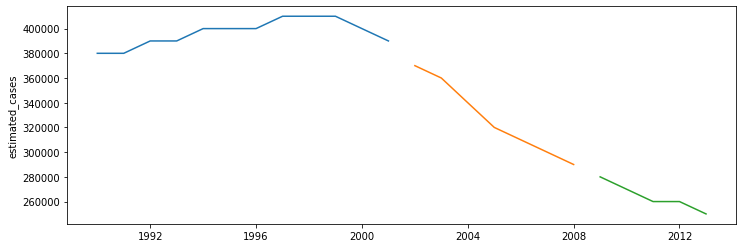

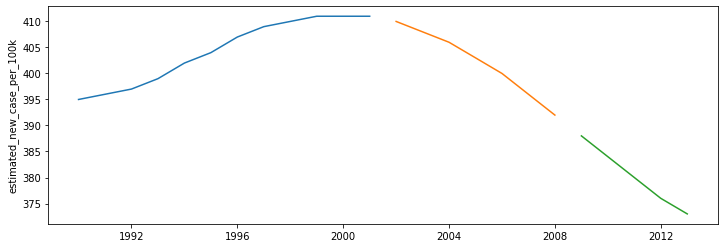

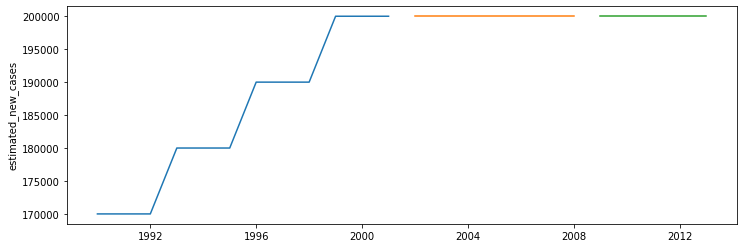

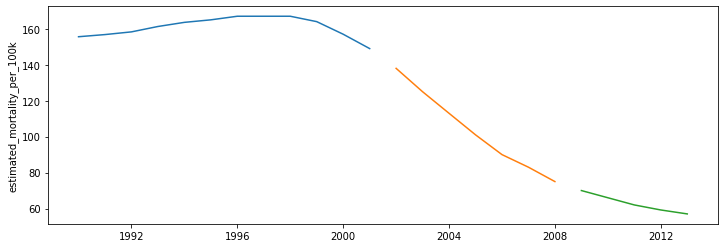

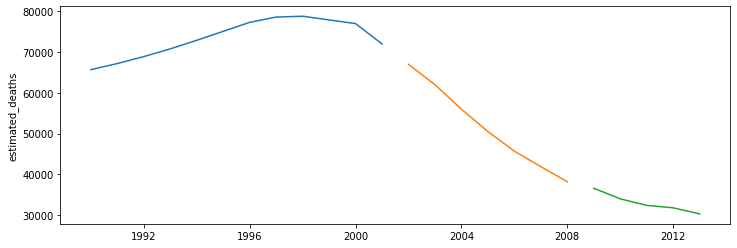

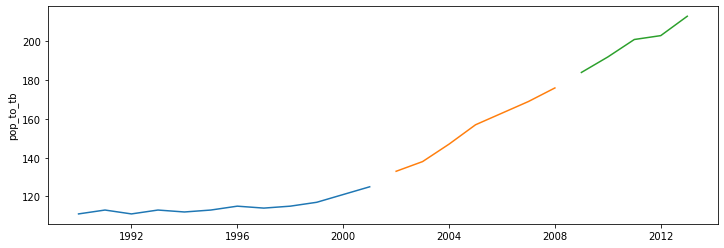

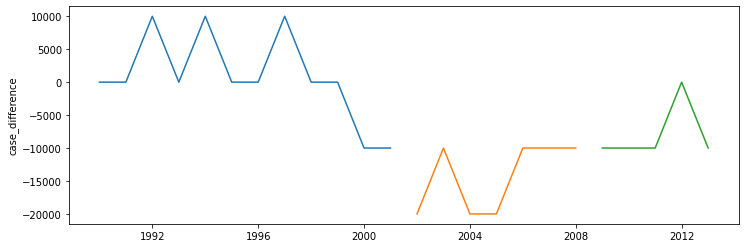

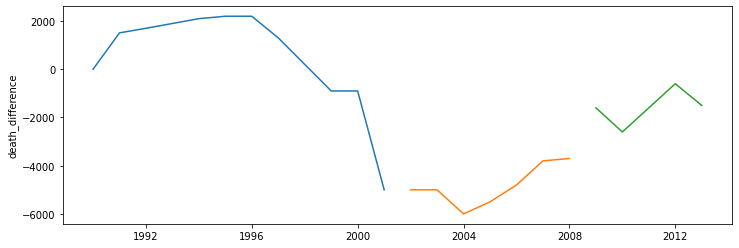

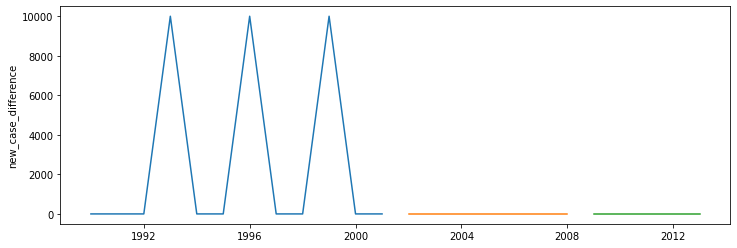

In [18]:
train, validate, test = time_split(df)

Create a y data frame and decompose it:

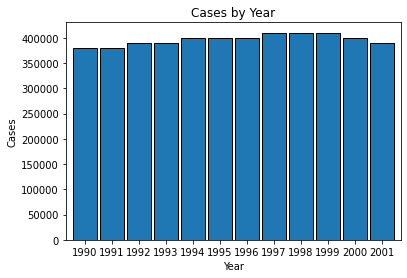

Cases Seasonality Decomposition:
                   y     trend  seasonal  resid
year                                           
1990-01-01  380000.0  380000.0       0.0    0.0
1991-01-01  380000.0  380000.0       0.0    0.0
1992-01-01  390000.0  390000.0       0.0    0.0
1993-01-01  390000.0  390000.0       0.0    0.0
1994-01-01  400000.0  400000.0       0.0    0.0




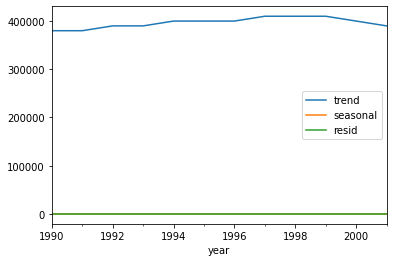

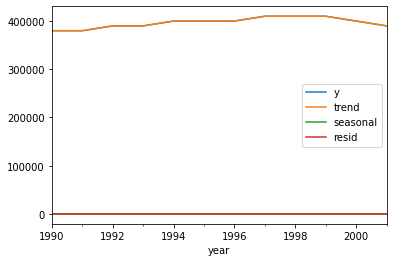

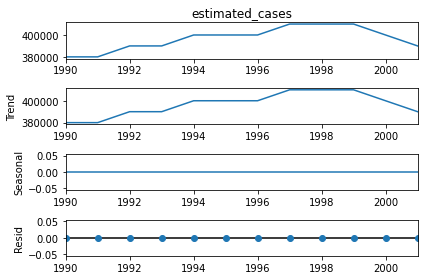

In [19]:
y = y_tests(train)

No seasons it seems.

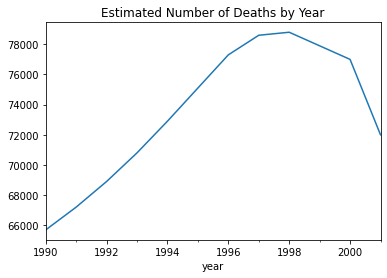

In [20]:
train.resample('Y').estimated_deaths.mean().plot()
plt.title("Estimated Number of Deaths by Year")
plt.show()

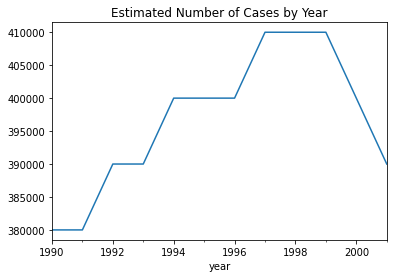

In [21]:
train.resample('Y').estimated_cases.mean().plot()
plt.title("Estimated Number of Cases by Year")
plt.show()

-----
#### Stats Tests:

Distributions are Bimodal not Normal, and we're going to compare the mean of subgroups. So We'll Be running Mann-Whitney tests.

In [22]:
stats_tests(train)

H0: The mean of estimated cases from 1990 to 1995 is equal to the mean of estimated cases from 1996 to 2001.
Ha: The mean of estimated cases from 1990 to 1995 is not equal to the mean of estimated cases from 1996 to 2001.
------
We reject the Null Hypothesis


H0: The mean of estimated cases from 1990 to 1995 is less than or equal to the mean of estimated cases from 1996 to 2001.
Ha: The mean of estimated cases from 1990 to 1995 is greater than the mean of estimated cases from 1996 to 2001.
------
We fail to reject the Null Hypothesis


H0: The mean of estimated cases from 1990 to 1995 is greater than or equal to the mean of estimated cases from 1996 to 2001.
Ha: The mean of estimated cases from 1990 to 1995 is less than to the mean of estimated cases from 1996 to 2001.
------
We reject the Null Hypothesis


Interesting, the Mean is actually rising, probably due to the spike from 1997 to 1999, at that plateau.

------

#### Modeling:

We'll try Average Mean (which is the baseline), Holt's Linear, and Last Observed. With a cameo from Facebook Prophet as I want to keep trying it out.

In [23]:
# Need an eval_df for comparing and a yhat for comparing baseline predictions to model predictions.
eval_df = create_eval()
yhat_df = create_yhat(train, validate)
yhat_df

,baseline
year,
2002-01-01,396666.67
2003-01-01,396666.67
2004-01-01,396666.67
2005-01-01,396666.67
2006-01-01,396666.67
2007-01-01,396666.67
2008-01-01,396666.67


estimated_cases -- RMSE: 75003


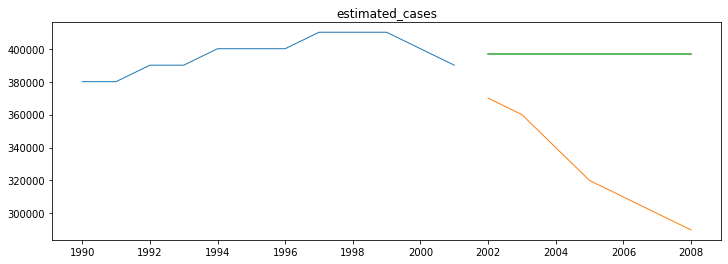

predictions:
             baseline  estimated_cases
year                                  
2002-01-01  396666.67        396666.67
2003-01-01  396666.67        396666.67
2004-01-01  396666.67        396666.67
2005-01-01  396666.67        396666.67
2006-01-01  396666.67        396666.67
2007-01-01  396666.67        396666.67
2008-01-01  396666.67        396666.67
----
  model_type       target_var     rmse
0   Baseline  Estimated Cases  75003.0


In [24]:
eval_df = baseline(train, validate, yhat_df, eval_df)

estimated_cases -- RMSE: 81229


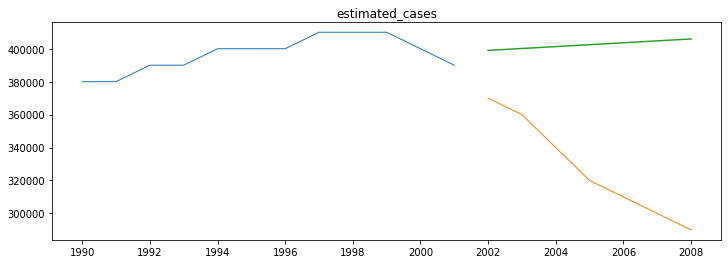

predictions:
             baseline  estimated_cases
year                                  
2002-01-01  396666.67        398979.62
2003-01-01  396666.67        400137.95
2004-01-01  396666.67        401296.28
2005-01-01  396666.67        402454.62
2006-01-01  396666.67        403612.95
2007-01-01  396666.67        404771.28
2008-01-01  396666.67        405929.61
----
  model_type       target_var     rmse
0   Baseline  Estimated Cases  75003.0
1      Holts  Estimated Cases  81229.0


In [25]:
eval_df = holts_model(train, validate, yhat_df, eval_df)

estimated_cases -- RMSE: 68868


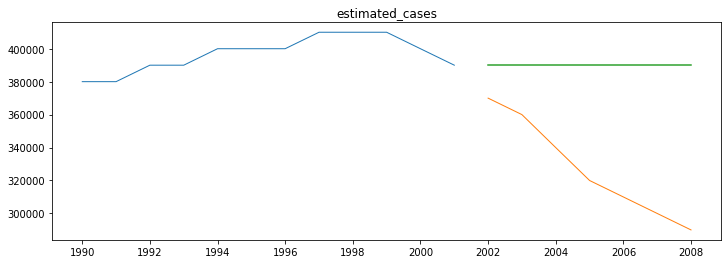

predictions:
             baseline  estimated_cases
year                                  
2002-01-01  396666.67         390000.0
2003-01-01  396666.67         390000.0
2004-01-01  396666.67         390000.0
2005-01-01  396666.67         390000.0
2006-01-01  396666.67         390000.0
2007-01-01  396666.67         390000.0
2008-01-01  396666.67         390000.0
----
      model_type       target_var     rmse
0       Baseline  Estimated Cases  75003.0
1          Holts  Estimated Cases  81229.0
2  Last Observed  Estimated Cases  68868.0


In [26]:
eval_df = last_observed(train, validate, yhat_df, eval_df)

We'll judge on the three I know how to use better, so let's look at our best model via rmse, and then we'll look at FB Prophet.

      model_type       target_var     rmse
2  Last Observed  Estimated Cases  68868.0


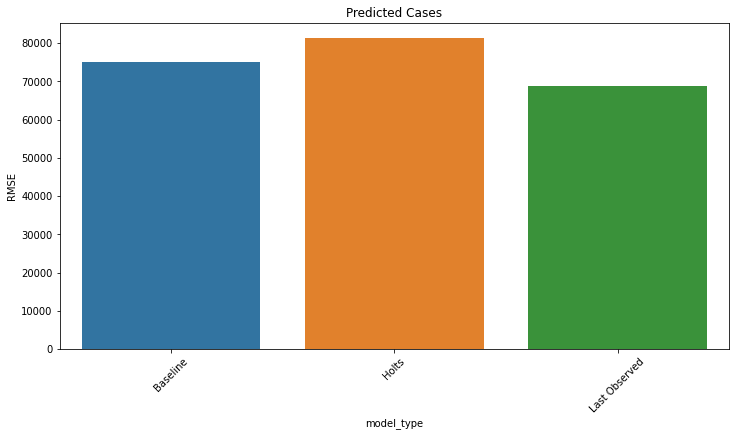

In [27]:
best_rmse(eval_df, train)

Last Observed is slightly better, but I don't think I have the knowledge yet to apply Time Series to this Data.

Let's look at FB Prophet. Probably the best model, I still need to look into validating and testing it.

08:50:13 - cmdstanpy - INFO - Chain [1] start processing
08:50:13 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
0  1990-01-01  379433.680000  376217.775969  382962.852851
1  1991-01-01  384067.496372  380694.998556  387396.696128
2  1992-01-01  386705.066881  383150.300594  390244.645553
3  1993-01-01  390523.762170  387128.411801  394095.364372
4  1994-01-01  397134.028694  393734.451789  400682.133582
5  1995-01-01  401392.672055  397917.627480  404574.773152
6  1996-01-01  403655.069030  399996.559251  407122.951518
7  1997-01-01  407098.385589  403911.808657  410370.608052
8  1998-01-01  411476.998818  408142.747308  414781.927136
9  1999-01-01  406298.618858  402724.772255  409621.663499
10 2000-01-01  399123.992971  395714.362885  402838.970222
11 2001-01-01  393104.431816  389426.808792  396732.377452


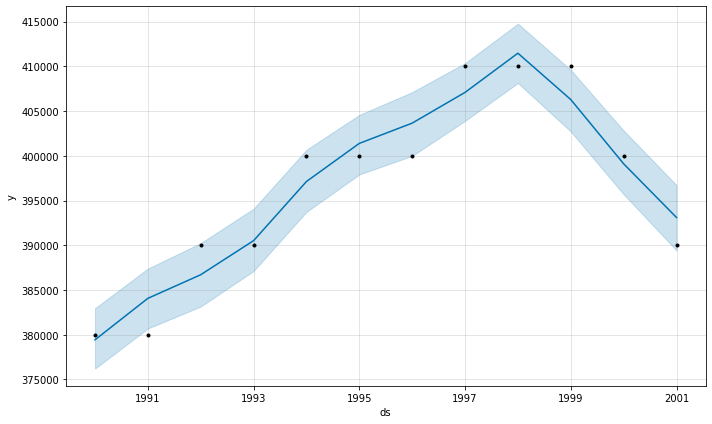

In [28]:
fb_prophet(y)

We'll go on to testing on Last Observed.

----

#### Testing:

On Test:
rmse : Estimated Cases: 27928.48


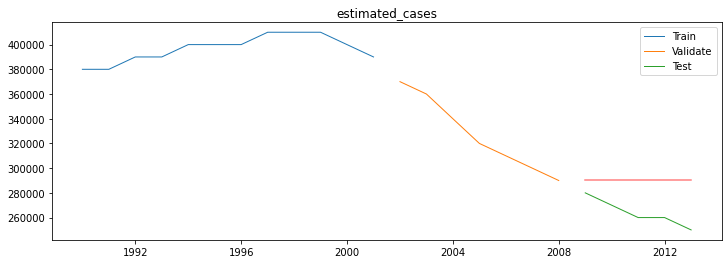

In [30]:
# Testing Last Observed on the Test Dataframe.
test_model(train, validate, test)

#### Summary: 
The Model is actually a lot better on Test, but I feel that's more for how little data is being predicted and the slightly more shallow slope vs. validate.

Coming back and trying other ML types on this data is a must. As well as looking into how FB Prophet works further.